In [40]:
import pandas as pd

df = pd.read_csv('REXCURVE 2025-09-05 084850 011.csv', sep=';', decimal=',')
column_names = df.iloc[2].tolist()
# Jouw string (neem aan dat dit precies de inhoud van je list is)
column_names_str = ',Actual position value,Actual velocity value,Actual torque/force value,Target position,Actual position value,Actual velocity value,Actual torque/force value,Target position,Actual position value,Actual velocity value,Actual torque/force value,Target position,Actual position value,Actual velocity value,Actual torque/force value,Target position,Actual position value,Actual velocity value,Actual torque/force value,Actual position value,Actual velocity value,Actual torque/force value,Target position,Actual position value,Actual velocity value,Actual torque/force value,Actual position value,Actual velocity value,Actual torque/force value,Actual position value,Actual velocity value,Actual torque/force value,Actual position value,Actual velocity value,Actual torque/force value,FlexProfile  current set,FlexProfile  current set,FlexProfile  current step,FlexProfile  current step,FlexProfile  current step,FlexProfile  current step,Actual position value,Actual velocity value,Actual torque/force value,Actual position value,Actual velocity value,Actual torque/force value,HMI.BalgB.BalgVullen_aan,HMI.BalgB.Balgvullen_bediend,HMI.BalgR.BalgVullen_aan,HMI.BalgR.Balgvullen_bediend,HMI.StangData.d_stang,HMI.StangData.d_vert,HMI.StangData.d_hor,HMI.StangData.Ls,HMI.StangData.L1,HMI.StangData.L2,HMI.StangData.PV,Actual position value,Actual velocity value,Actual torque/force value,Actual position value,Actual velocity value,Actual torque/force value,Actual position value,Actual velocity value,Actual torque/force value,Actual position value,Actual velocity value,Actual torque/force value,HMI.VerStel1_L.Settings.GewenstePositie,HMI.VerStel1_R.Settings.GewenstePositie,HMI.VerStel2_B.Settings.GewenstePositie,HMI.VerStel2_O.Settings.GewenstePositie,UserVarGlobal.KnipklemOpen,UserVarGlobal.KnipklemSluiten,UserVarGlobal.AfvoerCCw,UserVarGlobal.AfvoerLeeg,UserVarGlobal.AfvoerSlagAfkeur,UserVarGlobal.AfvoerSlagGoed,UserVarGlobal.AfvoerStang,UserVarGlobal.AfvoerStart,'

column_names_str = column_names_str.strip(',')

column_names_list = column_names_str.split(',')

column_names_list = [name.strip() for name in column_names_list]

df = pd.read_csv('REXCURVE 2025-09-05 084850 011.csv', skiprows=5, engine='python', encoding='utf-8')

# Verwijder de laatste kolom
df = df.iloc[:, :-1]  # nu 83 kolommen

# Voeg een placeholder voor de eerste kolom toe ('Time')
column_names_list = ['Time'] + column_names_list  # nu 83 namen

# Controleer match
print(len(column_names_list), df.shape[1])  # moeten hetzelfde zijn

# Zet de kolomnamen
df.columns = column_names_list

# Optioneel: kijk eerste paar kolommen
df.to_csv('084850.csv')

83 83


In [57]:
histo_df = pd.read_csv('084850.csv')
histo_df = histo_df.iloc[:, 1:]  # houdt alle kolommen behalve de eerste
df = histo_df
df.columns

Index(['Time', 'Actual position value', 'Actual velocity value',
       'Actual torque/force value', 'Target position',
       'Actual position value.1', 'Actual velocity value.1',
       'Actual torque/force value.1', 'Target position.1',
       'Actual position value.2', 'Actual velocity value.2',
       'Actual torque/force value.2', 'Target position.2',
       'Actual position value.3', 'Actual velocity value.3',
       'Actual torque/force value.3', 'Target position.3',
       'Actual position value.4', 'Actual velocity value.4',
       'Actual torque/force value.4', 'Actual position value.5',
       'Actual velocity value.5', 'Actual torque/force value.5',
       'Target position.4', 'Actual position value.6',
       'Actual velocity value.6', 'Actual torque/force value.6',
       'Actual position value.7', 'Actual velocity value.7',
       'Actual torque/force value.7', 'Actual position value.8',
       'Actual velocity value.8', 'Actual torque/force value.8',
       'Actual pos

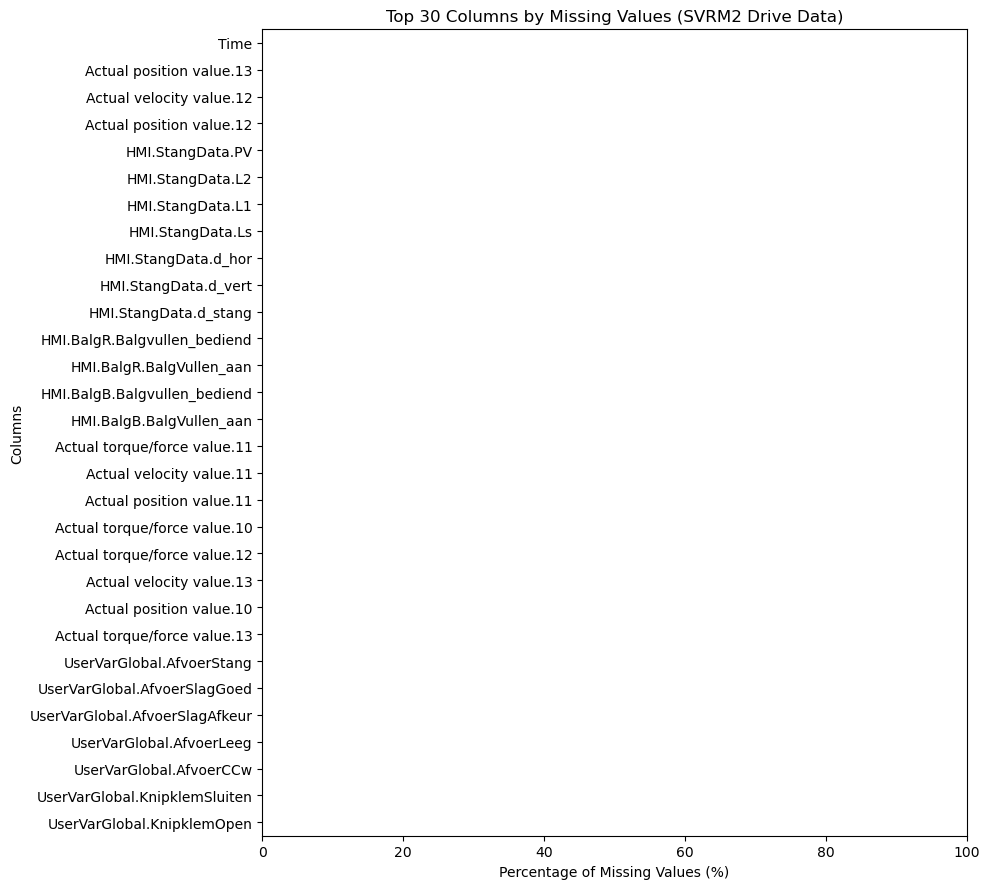

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Percentage missing per kolom
missing_percentage = histo_df.isna().mean() * 100

# Top 30 kolommen met hoogste missing values
top30_missing = missing_percentage.sort_values(ascending=False).head(30)

# Plot horizontale bar chart
plt.figure(figsize=(10, max(6, 0.3*len(top30_missing))))
top30_missing.plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Columns')
plt.title('Top 30 Columns by Missing Values (SVRM2 Drive Data)')
plt.xlim(0, 100)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
